In [146]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

df1 = pd.read_csv("cbb17.csv")
df1 = df1.dropna()
df1

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0
1,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,34.3,31.6,51.0,46.3,35.5,33.9,72.8,8.4,Champions,1.0
2,Villanova,BE,36,32,122.2,92.5,0.9611,57.5,48.1,17.1,...,35.0,22.1,59.2,49.1,36.9,31.1,65.6,11.1,R32,1.0
3,Kansas,B12,36,31,121.5,94.5,0.9472,56.1,48.1,17.6,...,36.0,30.0,53.6,45.3,40.4,35.6,71.4,11.0,E8,1.0
4,Kentucky,SEC,38,32,118.3,91.3,0.9517,52.9,47.5,15.7,...,40.9,33.5,52.9,48.3,35.3,30.6,73.7,9.0,E8,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,South Dakota St.,Sum,33,18,108.2,109.7,0.4612,53.2,53.8,18.4,...,39.9,27.1,52.7,52.4,35.8,36.9,68.5,-9.8,R64,16.0
64,New Orleans,Slnd,29,20,99.6,101.2,0.4538,50.2,50.3,23.7,...,42.8,34.7,51.6,51.8,30.7,31.9,67.7,-6.3,R68,16.0
65,Mount St. Mary's,NEC,36,20,98.9,101.8,0.4155,51.0,49.9,19.2,...,32.4,32.6,49.4,49.5,35.8,34.1,68.3,-7.9,R64,16.0
66,UC Davis,BW,34,23,97.4,100.8,0.4033,48.4,48.7,20.3,...,40.8,33.1,46.9,48.5,34.5,32.6,70.3,-7.5,R64,16.0


In [134]:
df1 = df1[df1.POSTSEASON != "R68"]
df1 = df1.replace({"R64": 0, "R32": 1, "S16": 2, "E8": 3, "F4": 4, "2ND": 5, "Champions": 6})
df1

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,5,1.0
1,North Carolina,ACC,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,...,34.3,31.6,51.0,46.3,35.5,33.9,72.8,8.4,6,1.0
2,Villanova,BE,36,32,122.2,92.5,0.9611,57.5,48.1,17.1,...,35.0,22.1,59.2,49.1,36.9,31.1,65.6,11.1,1,1.0
3,Kansas,B12,36,31,121.5,94.5,0.9472,56.1,48.1,17.6,...,36.0,30.0,53.6,45.3,40.4,35.6,71.4,11.0,3,1.0
4,Kentucky,SEC,38,32,118.3,91.3,0.9517,52.9,47.5,15.7,...,40.9,33.5,52.9,48.3,35.3,30.6,73.7,9.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Jacksonville St.,OVC,33,20,104.4,104.2,0.5054,52.6,49.4,20.7,...,33.4,34.4,50.8,45.1,37.2,37.8,65.0,-8.0,0,15.0
63,South Dakota St.,Sum,33,18,108.2,109.7,0.4612,53.2,53.8,18.4,...,39.9,27.1,52.7,52.4,35.8,36.9,68.5,-9.8,0,16.0
65,Mount St. Mary's,NEC,36,20,98.9,101.8,0.4155,51.0,49.9,19.2,...,32.4,32.6,49.4,49.5,35.8,34.1,68.3,-7.9,0,16.0
66,UC Davis,BW,34,23,97.4,100.8,0.4033,48.4,48.7,20.3,...,40.8,33.1,46.9,48.5,34.5,32.6,70.3,-7.5,0,16.0


In [135]:
outputs = df1["POSTSEASON"]
df1 = df1.drop(["TEAM", "CONF"], axis=1)
outputs

0     5
1     6
2     1
3     3
4     3
     ..
61    0
63    0
65    0
66    0
67    0
Name: POSTSEASON, Length: 64, dtype: int64

In [136]:
df1

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,...,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,5,1.0
1,39,33,121.0,91.5,0.9615,51.7,48.1,16.2,18.6,41.3,...,34.3,31.6,51.0,46.3,35.5,33.9,72.8,8.4,6,1.0
2,36,32,122.2,92.5,0.9611,57.5,48.1,17.1,20.1,30.2,...,35.0,22.1,59.2,49.1,36.9,31.1,65.6,11.1,1,1.0
3,36,31,121.5,94.5,0.9472,56.1,48.1,17.6,18.6,34.1,...,36.0,30.0,53.6,45.3,40.4,35.6,71.4,11.0,3,1.0
4,38,32,118.3,91.3,0.9517,52.9,47.5,15.7,19.2,33.5,...,40.9,33.5,52.9,48.3,35.3,30.6,73.7,9.0,3,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,33,20,104.4,104.2,0.5054,52.6,49.4,20.7,16.6,31.2,...,33.4,34.4,50.8,45.1,37.2,37.8,65.0,-8.0,0,15.0
63,33,18,108.2,109.7,0.4612,53.2,53.8,18.4,16.2,27.1,...,39.9,27.1,52.7,52.4,35.8,36.9,68.5,-9.8,0,16.0
65,36,20,98.9,101.8,0.4155,51.0,49.9,19.2,21.7,23.1,...,32.4,32.6,49.4,49.5,35.8,34.1,68.3,-7.9,0,16.0
66,34,23,97.4,100.8,0.4033,48.4,48.7,20.3,19.6,29.1,...,40.8,33.1,46.9,48.5,34.5,32.6,70.3,-7.5,0,16.0


In [137]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16,8))
    plt.scatter(
        df1[feature],
        df1[target],
        c='black'
    )
    plt.xlabel("Team Stats for {}".format(feature))
    plt.ylabel("Games won in the tournament")
    plt.show()
    

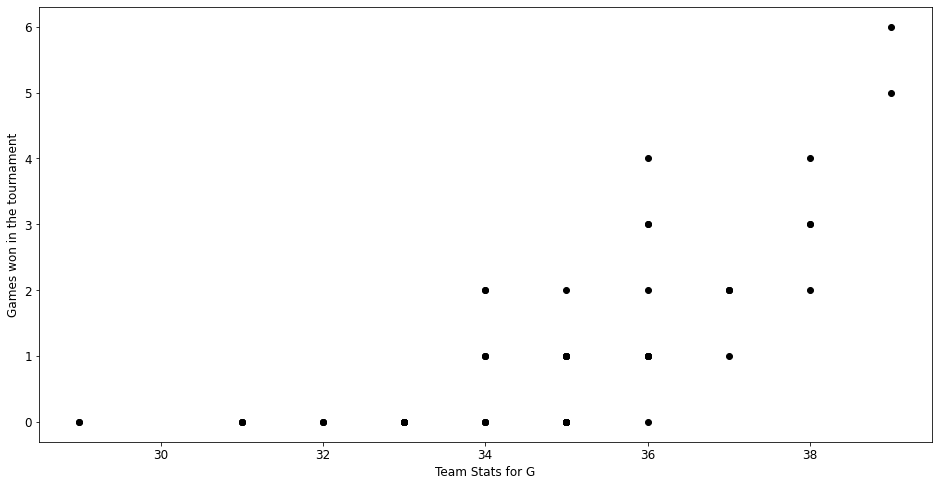

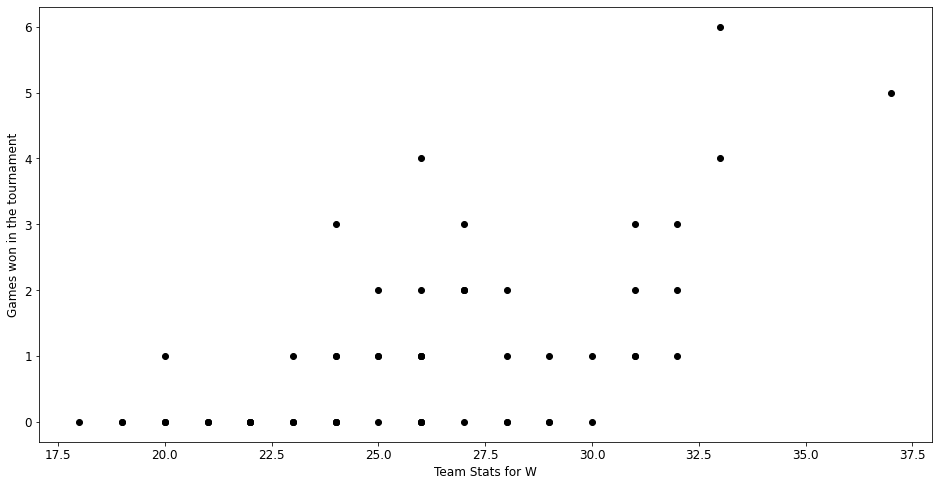

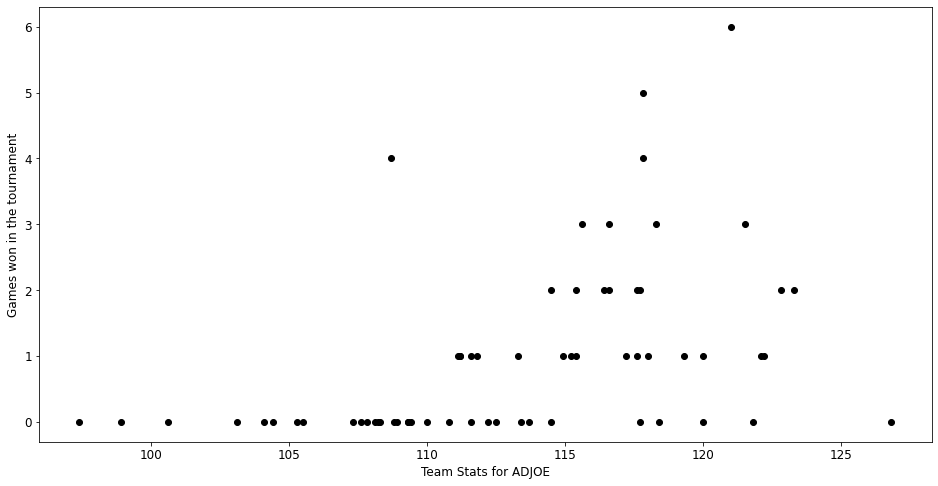

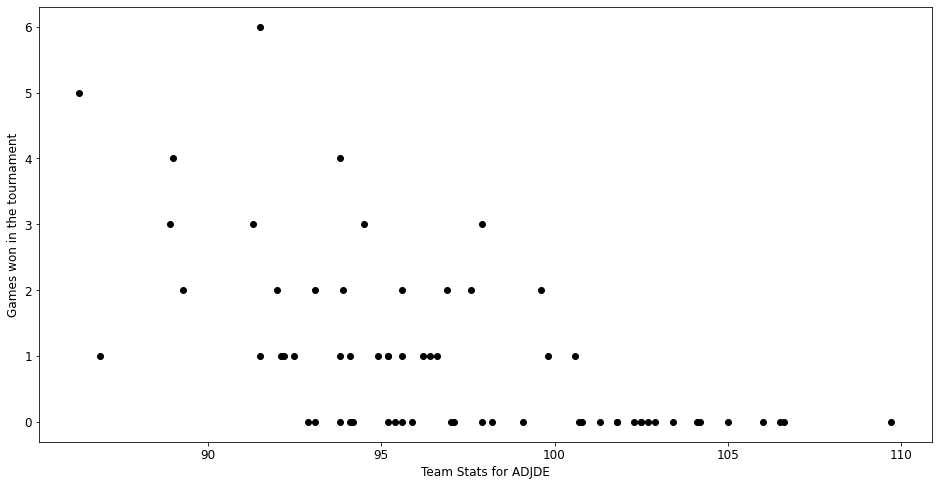

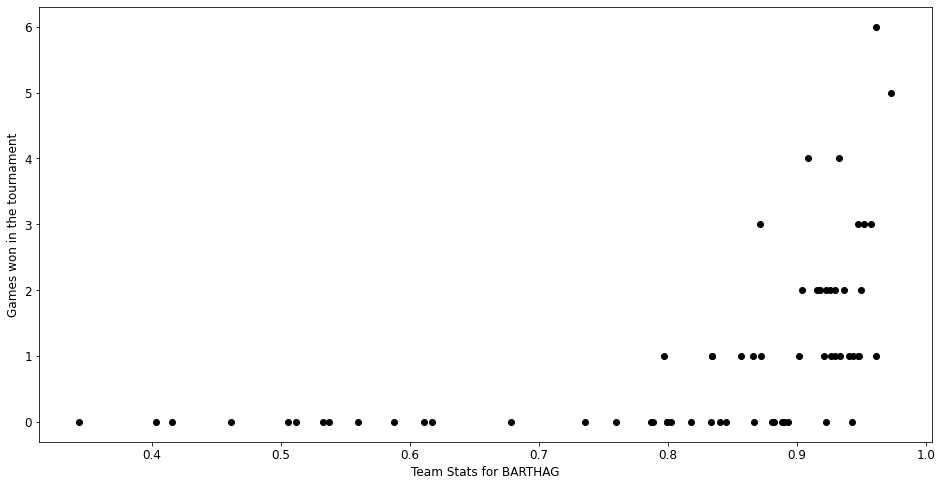

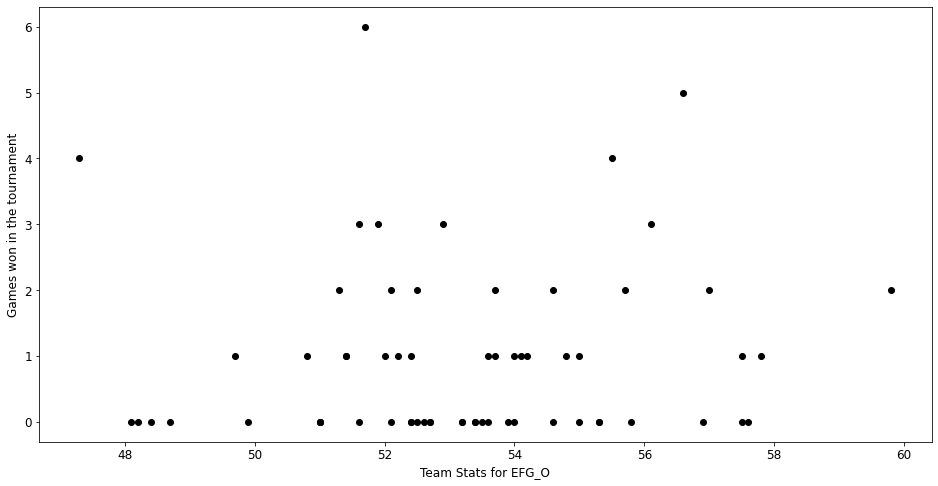

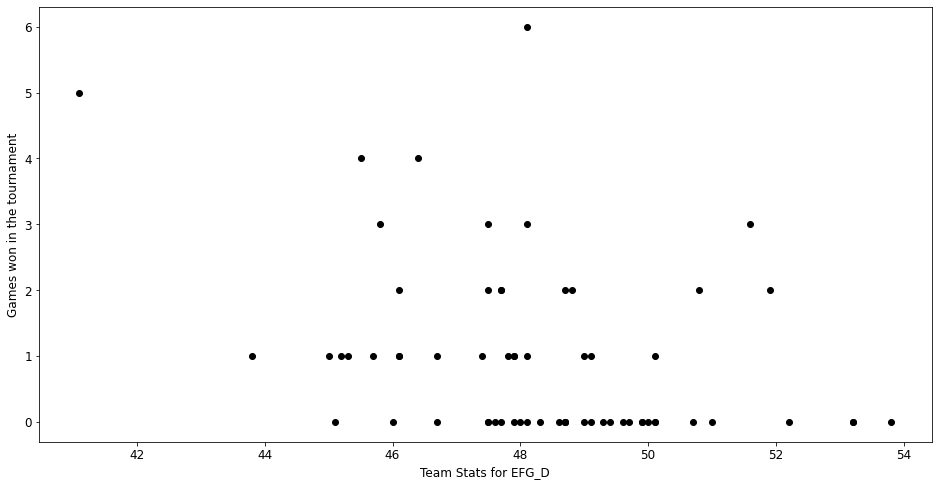

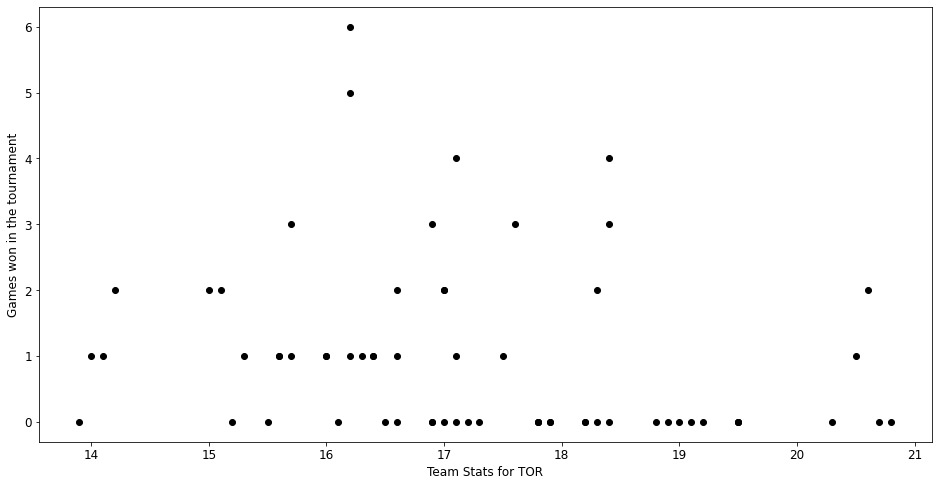

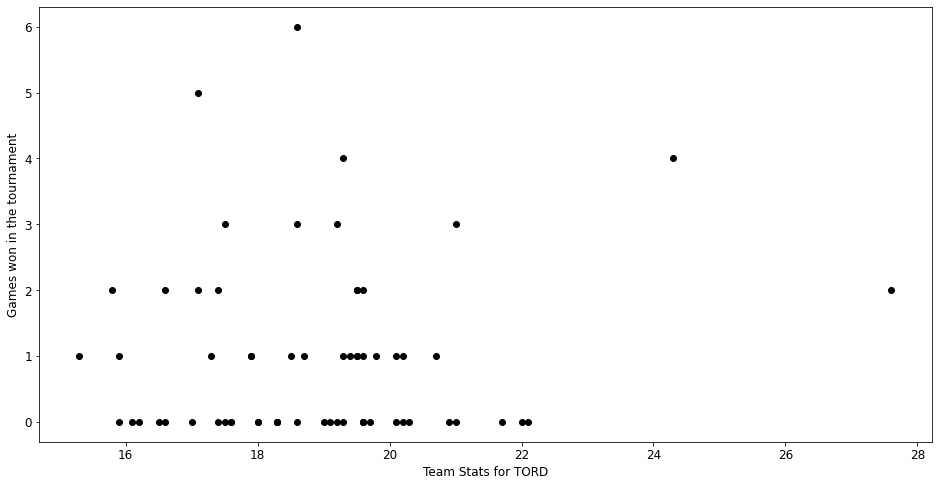

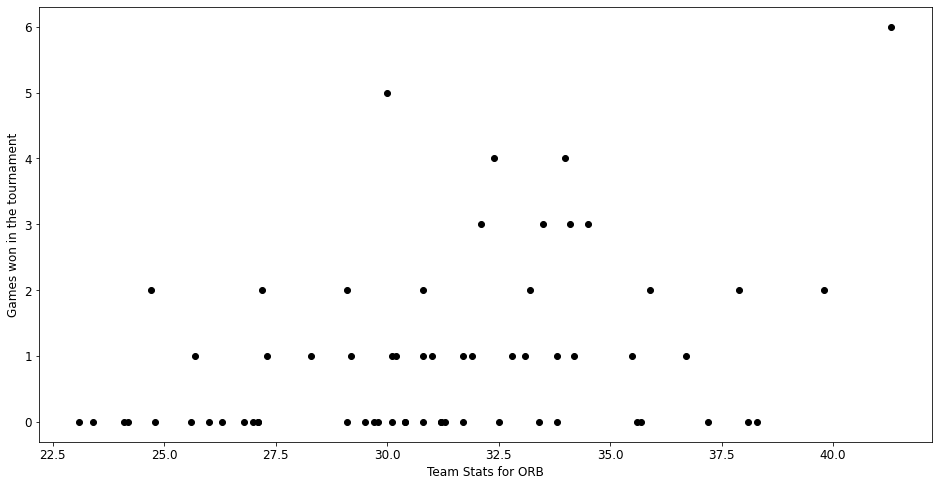

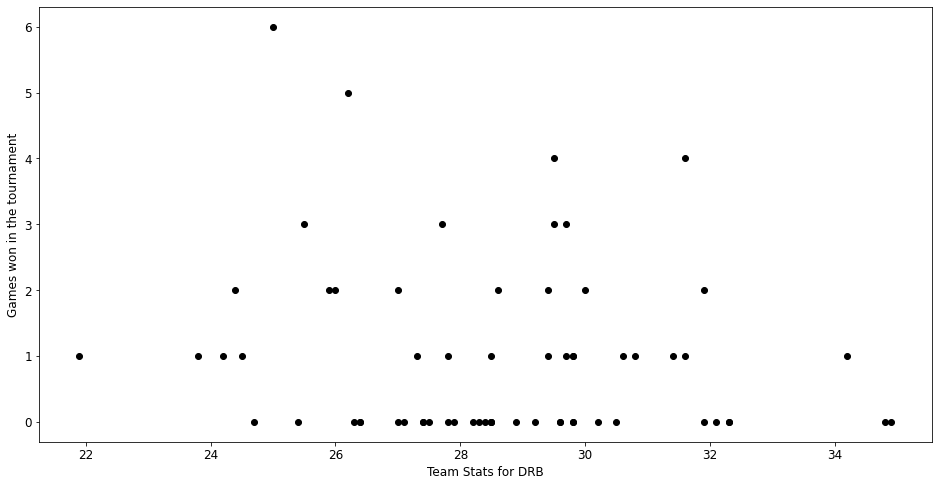

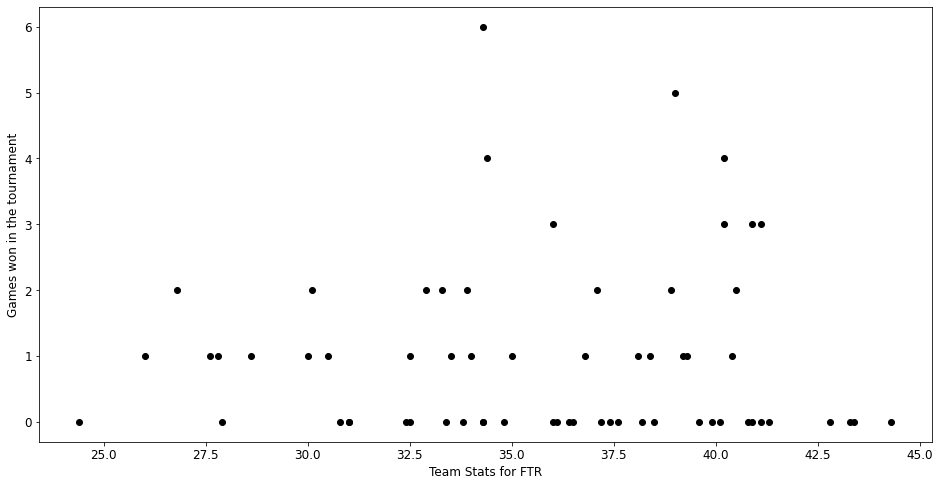

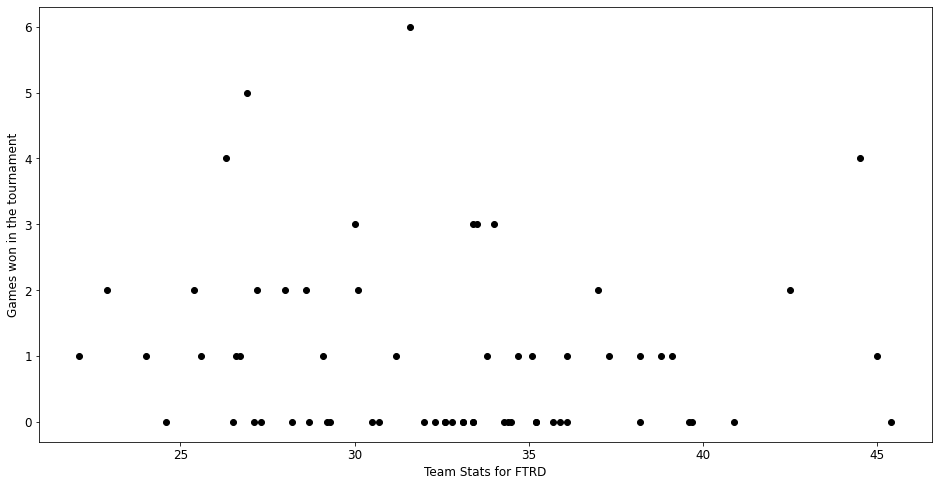

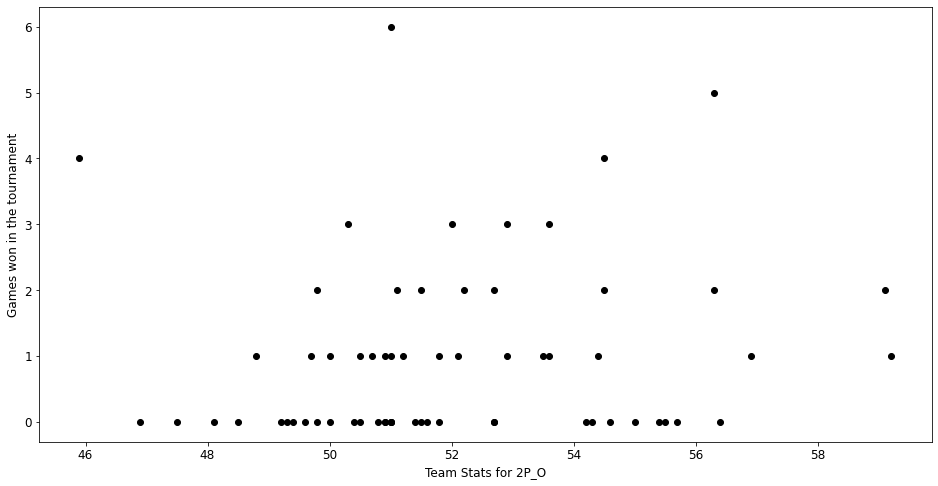

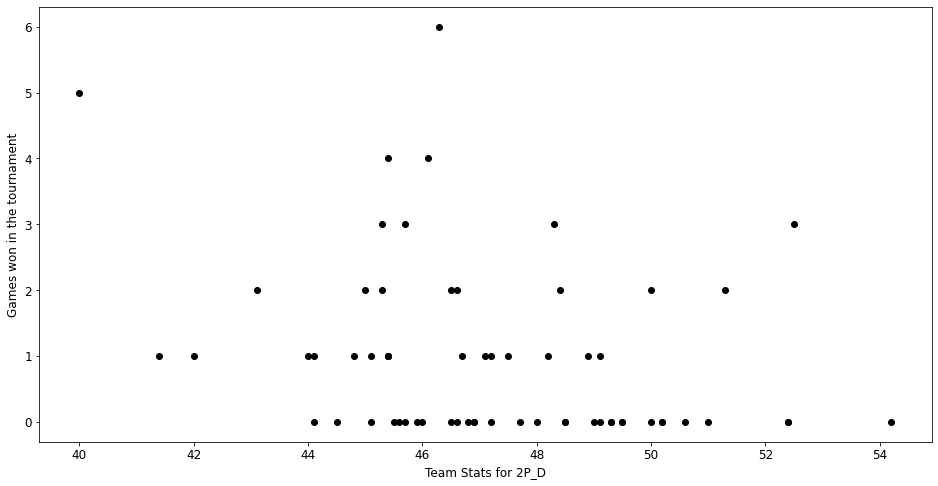

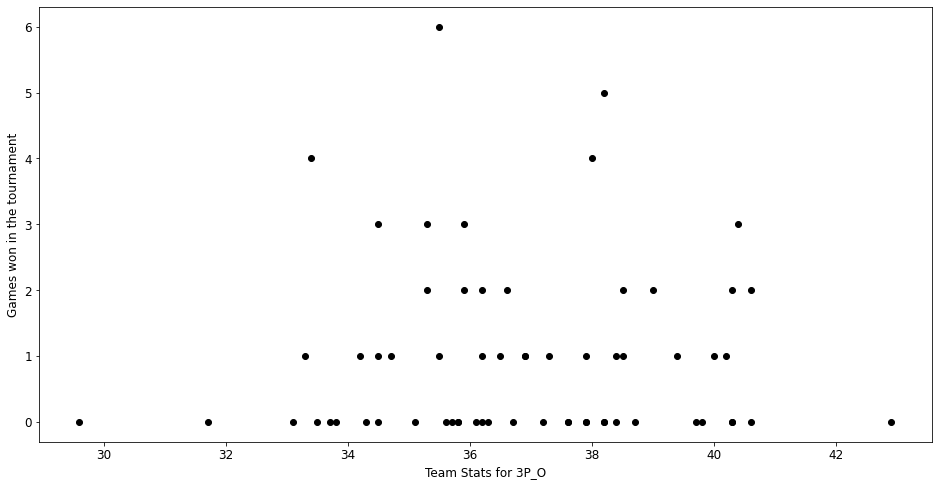

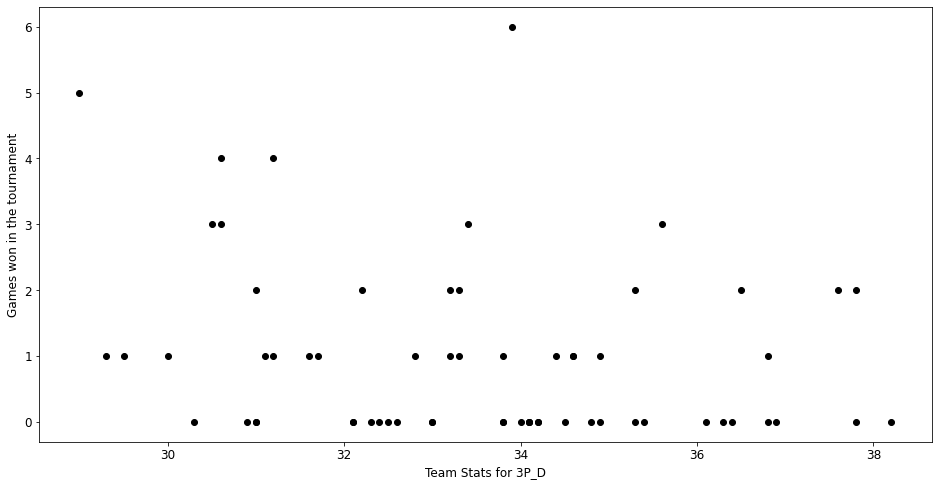

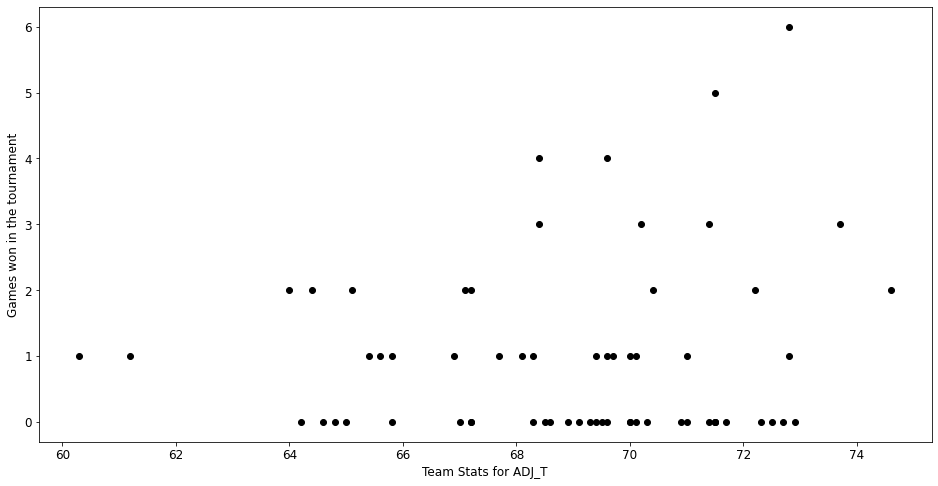

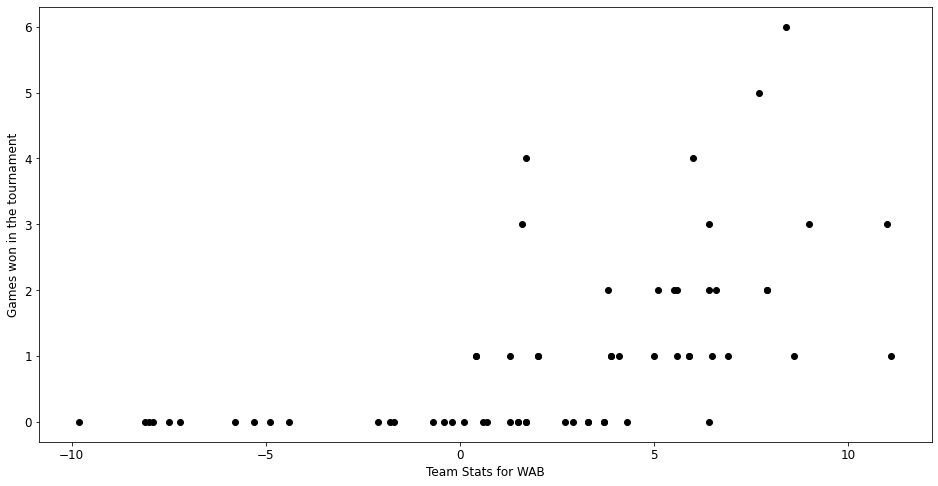

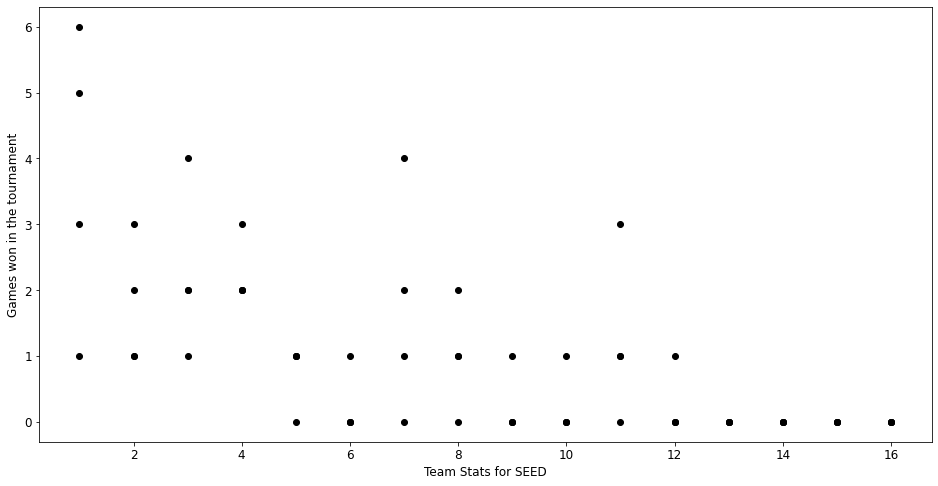

In [138]:
feature_names = []
for col in df1.columns:
    if col != 'POSTSEASON':
        scatter_plot(col, 'POSTSEASON')
        feature_names.append(col)

-1.1637441599963814
[ 3.58428114  3.46743645  2.24117959  1.93018872  3.05292319  1.34691312
  1.79034681  2.52228049  2.27367163  1.12103877  0.98084164  1.06344807
  2.09823099  2.55110131  1.70393006  0.71887766  0.11288422 -0.01323618
  1.25233645  1.10409624  1.19022811  1.96167749  0.58393819  1.21698297
  2.10341377  0.6520393   1.92906937 -0.75673874  1.71513129 -0.12686552
  0.82131264  0.28811505  2.41547721  0.50154533 -0.50731361  0.40536295
  1.19991143  0.62935607  0.18213653  1.71199187  0.17416758  0.95445541
  1.58228656  0.30624479  1.88573651  0.3214658  -0.31547602  1.0678065
  0.27485672  0.73275145  0.66691745 -0.10235966 -0.93474    -0.51487839
  0.92604497  2.27655868  1.52432027  0.65903125  0.81196207  1.92479386
  1.32250892  1.50379048  2.57825142 -0.54922084]


0.36044940917639

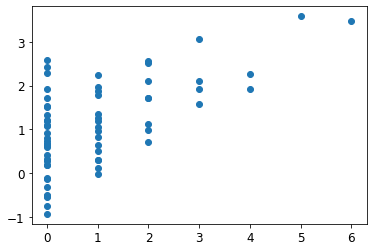

In [141]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

Xs = df1.drop(['POSTSEASON'], axis=1)
y = df1['POSTSEASON']

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE)

predictions = cross_val_predict(lin_reg, Xs, y, cv=5)
print(predictions)
plt.scatter(df1['POSTSEASON'], predictions)
metrics.r2_score(y, predictions)

In [ ]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# find best params and score for Ridge
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring="neg_mean_squared_error", cv=5)

ridge_regressor.fit(Xs, y)

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

In [ ]:
# ridge regression
ridge = Ridge(alpha=1e-4)
ridge.fit(Xs,y)
predictions = cross_val_predict(ridge, Xs, y, cv=5)
print(predictions)
plt.scatter(df1['POSTSEASON'], predictions)
metrics.r2_score(y, predictions)

In [130]:
from sklearn.linear_model import Lasso

# find best params and score for Lasso
lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(Xs, y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 0.001}
-0.9694125177902541


C:\Users\halea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.039245362554226, tolerance: 0.0040509803921568634
  model = cd_fast.enet_coordinate_descent(
C:\Users\halea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8.41504920734284, tolerance: 0.010698039215686276
  model = cd_fast.enet_coordinate_descent(
C:\Users\halea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Object

[ 3.26727252  3.28977015  2.05904867  1.79001833  2.90096617  1.25060044
  1.75084384  2.52713391  2.27197388  1.08422126  0.88410379  1.05364069
  1.96841637  2.56382169  1.75663018  0.68932966  0.15789622  0.02931407
  1.26319891  1.23104038  1.241731    1.96727826  0.69994219  1.19822166
  1.97285625  0.66709655  1.99571796 -0.71861392  1.68541945 -0.0690693
  0.88696018  0.38409305  2.28138159  0.53877051 -0.51456826  0.42303608
  1.15374514  0.54191296  0.09515593  1.72443538  0.26338735  1.01713344
  1.70732903  0.43739141  1.95887808  0.38732012 -0.37428939  1.16325565
  0.38978577  0.85177173  0.75880744 -0.17591117 -1.0787534  -0.88361103
  0.42966755  1.5560414   0.92041604  0.05168058  0.03161978  1.05411654
  0.38486279  0.47191932  1.51557778 -1.64780718]


C:\Users\halea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05022867378131224, tolerance: 0.0114984375
  model = cd_fast.enet_coordinate_descent(
C:\Users\halea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.45512737931345804, tolerance: 0.0040509803921568634
  model = cd_fast.enet_coordinate_descent(
C:\Users\halea\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_coordinate_descent.py:474: ConvergenceWarning: Objective

0.4606177740317743

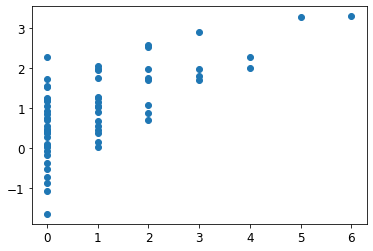

In [131]:
# lasso regression
lasso = Lasso(alpha=1e-3)
lasso.fit(Xs,y)
predictions = cross_val_predict(lasso, Xs, y, cv=5)
print(predictions)
plt.scatter(df1['POSTSEASON'], predictions)
metrics.r2_score(y, predictions)

In [ ]:
output = cross_validate(lasso, Xs, y, cv=5, scoring = 'neg_mean_squared_error', return_estimator =True)
get_feature_importance(output)

[1.96 1.86 1.43 1.39 2.17 1.2  1.94 2.01 1.82 1.17 1.35 1.3  1.76 2.69
 1.55 0.93 1.82 1.45 1.49 1.13 1.56 1.93 0.77 0.68 2.44 1.49 0.89 0.04
 0.89 0.34 0.44 0.4  0.33 0.13 0.37 0.06 1.17 1.05 0.58 0.26 0.18 0.3
 1.01 0.63 0.45 0.35 0.28 0.3  0.14 0.3  0.14 0.14 0.14 0.06 0.15 0.16
 0.14 0.01 0.02 0.36 0.06 1.12 0.09 0.2 ]


0.40521918738959095

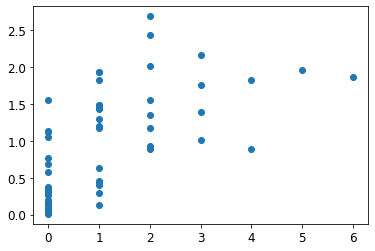

In [118]:
# random forest regression
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(random_state=0, n_estimators=100)
predictions = cross_val_predict(random_forest, Xs, y, cv=5)
print(predictions)
plt.scatter(df1['POSTSEASON'], predictions)
metrics.r2_score(y, predictions)

In [144]:
from sklearn.model_selection import cross_validate
output = cross_validate(random_forest, Xs, y, cv=5, scoring = 'neg_mean_squared_error', return_estimator =True)
for idx,estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_,
                                   index = feature_names,
                                    columns=['importance']).sort_values('importance', ascending=False)
    print(feature_importances)

Features sorted by their score for estimator 0:
         importance
G          0.289217
BARTHAG    0.138470
WAB        0.068404
SEED       0.051717
TOR        0.048718
ADJOE      0.046840
FTR        0.042690
2P_O       0.039634
EFG_D      0.037158
ADJDE      0.031930
DRB        0.030375
EFG_O      0.030303
2P_D       0.026288
TORD       0.024974
FTRD       0.020574
W          0.017130
3P_O       0.017114
ADJ_T      0.014947
3P_D       0.014516
ORB        0.009004
Features sorted by their score for estimator 1:
         importance
G          0.393220
BARTHAG    0.152336
ADJDE      0.085889
WAB        0.065316
W          0.053692
SEED       0.044809
2P_D       0.026755
ORB        0.022449
EFG_D      0.022259
ADJOE      0.021805
ADJ_T      0.018871
TOR        0.016649
DRB        0.016537
3P_D       0.010841
FTRD       0.010812
2P_O       0.010040
FTR        0.009208
TORD       0.008628
3P_O       0.005768
EFG_O      0.004115
Features sorted by their score for estimator 2:
         importa